In [78]:
import numpy as np
import pandas as pd 

import os
for dirname, _, filenames in os.walk(r'C:\Users\my\Downloads\ML'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


C:\Users\my\Downloads\ML\daily_csv.csv


In [79]:
dataset = pd.read_csv(r'C:\Users\my\Downloads\ML/daily_csv.csv')

In [80]:
dataset.head()

,Date,Price
0,1997-01-07,3.82
1,1997-01-08,3.80
2,1997-01-09,3.61
3,1997-01-10,3.92
4,1997-01-13,4.00


In [81]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5938 entries, 0 to 5937
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5938 non-null   object 
 1   Price   5937 non-null   float64
dtypes: float64(1), object(1)
memory usage: 92.9+ KB


In [82]:
dataset['year'] = pd.DatetimeIndex(dataset['Date']).year
dataset['month'] = pd.DatetimeIndex(dataset['Date']).month
dataset['day'] = pd.DatetimeIndex(dataset['Date']).day

In [83]:
dataset

,Date,Price,year,month,day
0,1997-01-07,3.82,1997,1,7
1,1997-01-08,3.80,1997,1,8
2,1997-01-09,3.61,1997,1,9
3,1997-01-10,3.92,1997,1,10
4,1997-01-13,4.00,1997,1,13
...,...,...,...,...,...
5933,2020-08-05,2.23,2020,8,5
5934,2020-08-06,2.26,2020,8,6
5935,2020-08-07,2.15,2020,8,7
5936,2020-08-10,2.18,2020,8,10


In [84]:
dataset.drop('Date', axis=1, inplace=True)

In [85]:
dataset.isnull().any()

Price     True
year     False
month    False
day      False
dtype: bool

In [86]:
dataset.isnull().sum()

Price    1
year     0
month    0
day      0
dtype: int64

In [87]:
dataset['Price'].fillna(dataset['Price'].mean(),inplace=True)

In [88]:
dataset.isnull().any()

Price    False
year     False
month    False
day      False
dtype: bool

Text(0.5, 1.0, 'PRICE OF NATURAL GAS ON THE BASIS OF DAYS OF A MONTH')

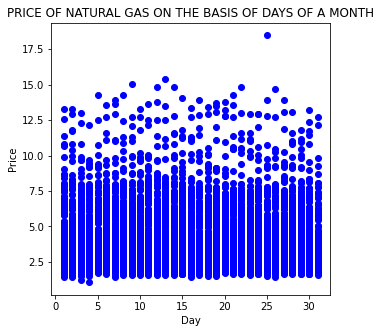

In [89]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(5,5))
plt.scatter(dataset['day'],dataset['Price'],color='blue')
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('PRICE OF NATURAL GAS ON THE BASIS OF DAYS OF A MONTH')

Text(0.5, 1.0, 'PRICE OF NATURAL GAS ON THE BASIS OF MONTHS OF A YEAR')

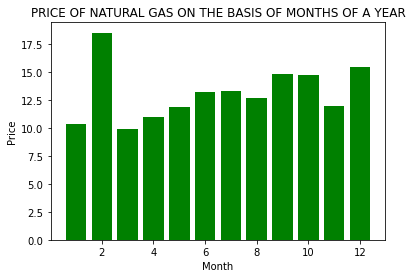

In [90]:
import matplotlib.pyplot as plt
plt.bar(dataset['month'],dataset['Price'],color='green')
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('PRICE OF NATURAL GAS ON THE BASIS OF MONTHS OF A YEAR')

<AxesSubplot:xlabel='year', ylabel='Price'>

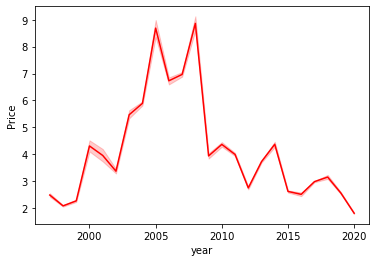

In [91]:
import seaborn as sns
sns.lineplot(x='year',y='Price',data=dataset,color='red')

<AxesSubplot:xlabel='month', ylabel='Price'>

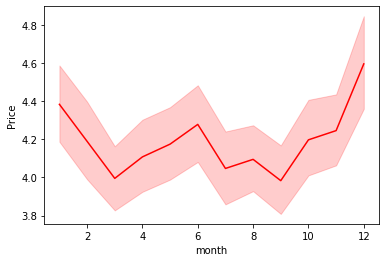

In [92]:
import seaborn as sns
sns.lineplot(x='month',y='Price',data=dataset,color='red')

<AxesSubplot:xlabel='day', ylabel='Price'>

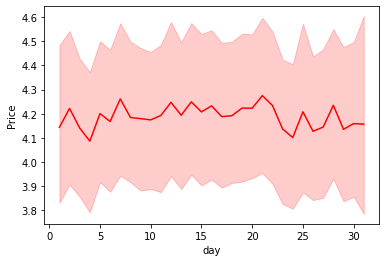

In [93]:
import seaborn as sns
sns.lineplot(x='day',y='Price',data=dataset,color='red')

Text(0.5, 1.0, 'PRICE OF NATURAL GAS ON THE BASIS OF MONTHS OF A YEAR')

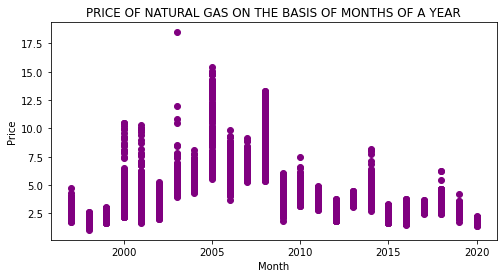

In [94]:
fig=plt.figure(figsize=(8,4))
plt.scatter(dataset['year'],dataset['Price'],color='purple')
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('PRICE OF NATURAL GAS ON THE BASIS OF MONTHS OF A YEAR')

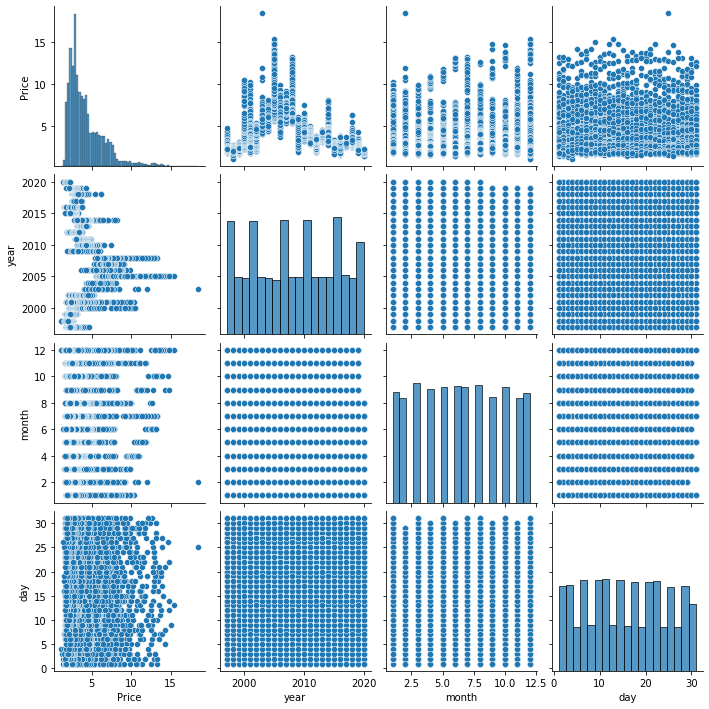

In [95]:
import seaborn as sns
sns.pairplot(dataset)
plt.show()


In [96]:
x=dataset.iloc[:,1:4].values 
y=dataset.iloc[:,0:1].values 

In [97]:
x

array([[1997,    1,    7],
       [1997,    1,    8],
       [1997,    1,    9],
       ...,
       [2020,    8,    7],
       [2020,    8,   10],
       [2020,    8,   11]], dtype=int64)

In [98]:
y

array([[3.82],
       [3.8 ],
       [3.61],
       ...,
       [2.15],
       [2.18],
       [2.19]])

In [99]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [100]:
x_train.shape

(4750, 3)

In [101]:
y_train.shape

(4750, 1)

In [102]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [103]:
y_pred=dtr.predict(x_test)
y_pred

array([3.43, 3.  , 8.24, ..., 2.16, 3.91, 4.35])

In [104]:
from sklearn.metrics import r2_score
accuracy=r2_score(y_test,y_pred)
accuracy

0.9722487859500294

In [105]:
y_p=dtr.predict([[1997,1,7]])
y_p

array([3.82])